In [186]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For data visualization based on Matplotlib
from wordcloud import WordCloud  # For creating word clouds

In [187]:
# import the dataset
df=pd.read_csv("data.csv")

In [188]:
# import the dataset
df

,Timestamp,Name,E-Mail (Christ E-mail ID),Gender,Registration Number,Department,Year,Choose the paper-based form submissions you have had an experience with.,How often do you avail the night-out forms or attendance claims on an average?,What is your take on the deadline given for the submission of the forms?,How do you find the process of securing signatures from faculties?,Difficulty level of the process,"What is your take on the time taken, on average, to complete and submit a paper-based claim form?",How would you describe your experience with the paper-based form submissions.,How often would you say your medical/co-curricular claims have been approved?,Which method of form submission would you prefer?,Additional comments (optional),Do you think the deadline for submitting medical/co-curricular forms must be increased?
0,10/11/2023 11:46:25,Jyosna philip,Jyosna.philip@msds.christuniversity.in,Female,23122019,MSC DS,1st Year,Medical form,0 - 25%,Bad,Bad,Hard,A couple of days,Bad,At all times,Online submission process,NaN,Yes
1,10/11/2023 11:46:57,Britto Fernandes,britto.fernandes@msds.christuniversity.in,Male,23122012,MSC DS,1st Year,Co-curricular form,0 - 25%,Bad,Need Improvement,Medium,A couple of days,Bad,Mostly approved,Online submission process,I feel that online submission would drasticall...,Yes
2,10/11/2023 11:47:47,yashi,yashi.s@msds.christuniversity.in,Female,23122144,MSC DS,1st Year,None,0 - 25%,Needs Improvement,Average,Medium,More than a week,Average,Mostly approved,Online submission process,NaN,Yes
3,10/11/2023 11:48:48,Sudiksha Sharma,sudiksha.sharma@msea.christuniversity.in,Female,23122306,MSC EA,1st Year,Night-out form,25 - 50%,Average,Average,Medium,One day,Average,Mostly approved,Online submission process,NaN,Yes
4,10/11/2023 11:49:02,Dipanwita Das,dipanwita.das@science.christuniversity.in,Female,23122046,MSC DS,1st Year,Medical form,0 - 25%,Good,Good,Medium,A couple of days,Needs Improvement,Mostly approved,Online submission process,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,10/25/2023 1:11:25,Khusi,khusi.viswakarma@mba.christuniversity.in,Female,23121022,MBA,1st Year,Medical form,25 - 50%,Bad,Bad,Hard,More than a week,Bad,Mostly approved,Online submission process,NaN,Yes
379,10/25/2023 1:11:49,Vishakha,vishakha.periwal@law.christuniversity.in,Male,22111033,BBA,1st Year,Medical form,50 - 75%,Average,Need Improvement,Medium,A couple of days,Average,Mostly approved,Online submission process,NaN,Maybe
380,10/25/2023 1:12:12,MOHAMMAD AZEEM SAVADATTI,azeem.savadatti@mba.christuniversity.in,Male,23121026,MBA,1st Year,Night-out form,50 - 75%,Average,Average,Hard,A couple of days,Average,Mostly approved,Offline submission process,NaN,No
381,10/25/2023 1:13:25,Meenaksi,meenaksi@mba.christuniversity.com,Female,23121025,MBA,1st Year,Night-out form,0 - 25%,Bad,Bad,Hard,A few hours,Bad,At all times,Online submission process,NaN,Yes


In [189]:
# Output information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 18 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   Timestamp                                                                                          383 non-null    object
 1   Name                                                                                               383 non-null    object
 2   E-Mail (Christ E-mail ID)                                                                          383 non-null    object
 3   Gender                                                                                             383 non-null    object
 4   Registration Number                                                                                383 non-null    int64 
 5   D

In [190]:
# chechikng the shape
df.shape

(383, 18)

In [191]:
# Retrieve unique values from the "Gender" column
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

<Axes: xlabel='Gender', ylabel='count'>

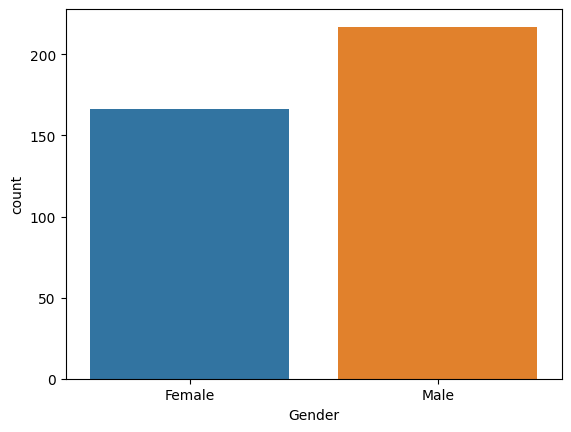

In [192]:
# Create a countplot to visualize the distribution of data based on the 'Gender' column
sns.countplot(x='Gender', data=df)

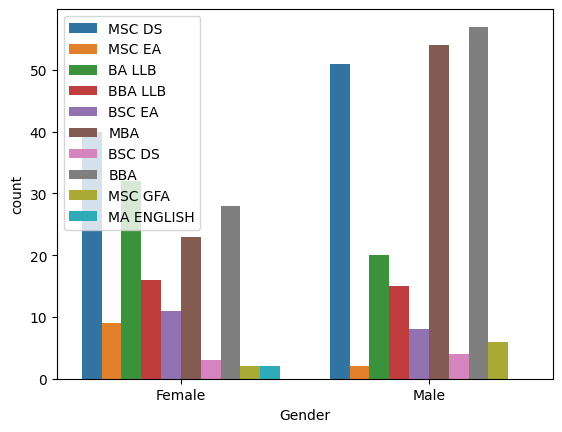

In [193]:
# Create a countplot to visualize the distribution of data based on 'Gender' with 'Department' as a hue
sns.countplot(x='Gender',hue="Department", data=df)
plt.legend(loc="upper left")

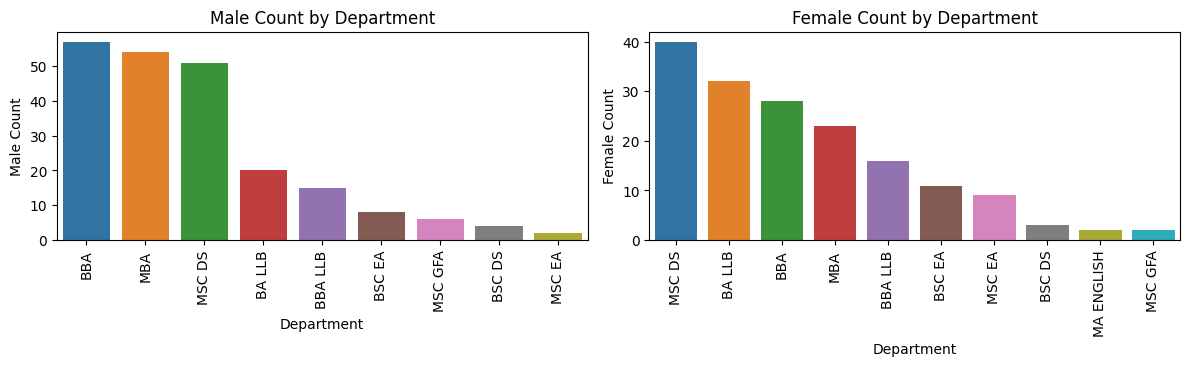

In [194]:
# Filter the DataFrame to create separate DataFrames for male and female gender categories.
male_data = df[df["Gender"] == "Male"]
female_data = df[df["Gender"] == "Female"]

# Count the occurrences of each department within the male and female DataFrames
male_gender_count = male_data["Department"].value_counts().reset_index()
female_gender_count = female_data["Department"].value_counts().reset_index()

# Rename the columns of the DataFrames to include 'Department,' 'Male Count,' and 'Female Count'
male_gender_count.columns = ['Department', 'Male Count']
female_gender_count.columns = ['Department', 'Female Count']

# Create a figure with a 2x2 grid of subplots and set the overall figure size.
plt.figure(figsize=(12, 6))

# Plot the 'Male Count' by department in the first subplot (top-left).
plt.subplot(2, 2, 1)
sns.barplot(x='Department', y='Male Count', data=male_gender_count)
plt.title('Male Count by Department')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability.

# Plot the 'Female Count' by department in the second subplot (top-right).
plt.subplot(2, 2, 2)
sns.barplot(x='Department', y='Female Count', data=female_gender_count)
plt.title('Female Count by Department')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability.

# Use 'plt.tight_layout()' to ensure subplots do not overlap, and finally, display the plot.
plt.tight_layout()
plt.show()

In [195]:
# getting unique values for dept
df["Department"].unique()

array(['MSC DS', 'MSC EA', 'BA LLB', 'BBA LLB', 'BSC EA', 'MBA', 'BSC DS',
       'BBA', 'MSC GFA', 'MA ENGLISH'], dtype=object)

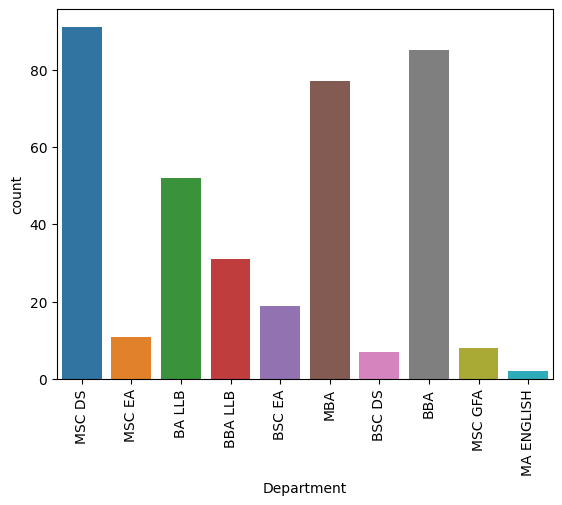

In [196]:
# visualize a count plot by dept
sns.countplot(x='Department', data=df)
plt.xticks(rotation=90)
plt.show()

In [197]:
# getting unique unique values
df["Year"].unique()

array(['1st Year', '3rd Year', '2nd Year', '5th Year', '4th Year'],
      dtype=object)

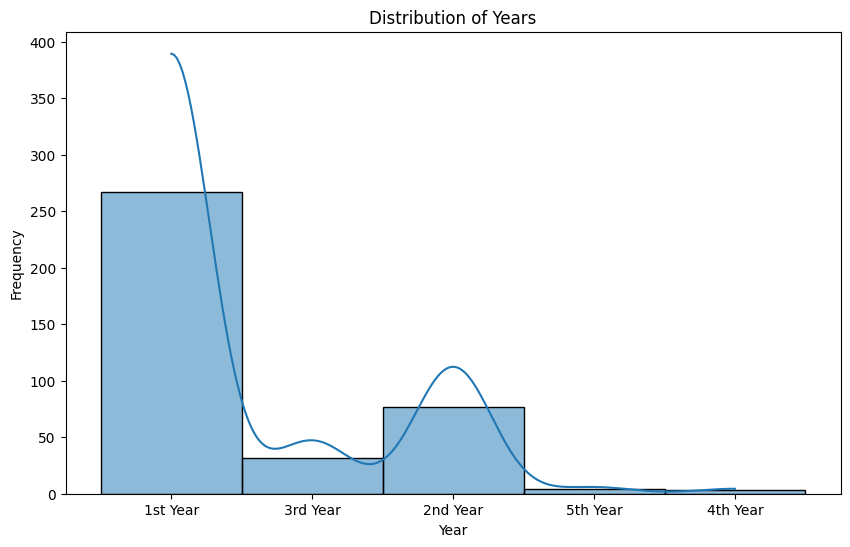

In [198]:
# Create a figure with a specified size (10 units wide and 6 units tall).
plt.figure(figsize=(10, 6))

# Generate a histogram and kernel density estimate (KDE) plot for the 'Year' column in the DataFrame.
# 'kde=True' adds the KDE curve to the histogram for a smooth density estimate.
# 'bins=5' specifies the number of bins for the histogram.
sns.histplot(df['Year'], kde=True, bins=5)

# Set the title, x-axis label, and y-axis label for the plot.
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Display the plot to visualize the distribution of years.
plt.show()

In [199]:
# unique values for from type
df["Choose the paper-based form submissions you have had an experience with."].unique()

array(['Medical form', 'Co-curricular form', 'None', 'Night-out form',
       'Co-curricular form, Medical form, Night-out form',
       'Medical form, Night-out form', 'Co-curricular form, Medical form',
       'Co-curricular form, Night-out form', 'Medical form, None',
       'Night-out form, None', 'Co-curricular form, None',
       'Co-curricular form, Medical form, None'], dtype=object)

In [200]:
# unique values from avg claims
df["How often do you avail the night-out forms or attendance claims on an average?"].unique()

array(['0 - 25%', '25 - 50%', '50 - 75%', '75 - 100%'], dtype=object)

In [201]:
# unique values for deadline
df["What is your take on the deadline given for the submission of the forms?"].unique()

array(['Bad', 'Needs Improvement', 'Average', 'Good', 'Excellent'],
      dtype=object)

In [202]:
#  gtting the unique values fro signature taking difficulties
df["How do you find the process of securing signatures from faculties?"].unique()

array(['Bad', 'Need Improvement', 'Average', 'Good', 'Excellent'],
      dtype=object)

In [203]:
# dificulty lavel of process
df["Difficulty level of the process"].unique()

array(['Hard', 'Medium', 'Easy'], dtype=object)

In [204]:
# unique values of days taking to fil the process
df["What is your take on the time taken, on average, to complete and submit a paper-based claim form?"].unique()

array(['A couple of days', 'More than a week', 'One day', 'A week',
       'A few hours'], dtype=object)

In [205]:
# unique values for subbmission exp
df["How would you describe your experience with the paper-based form submissions."].unique()

array(['Bad', 'Average', 'Needs Improvement', 'Good', 'Excellent', '0'],
      dtype=object)

In [206]:
# unique values for approval details
df["How often would you say your medical/co-curricular claims have been approved?"].unique()

array(['At all times', 'Mostly approved', 'Only a few'], dtype=object)

In [207]:
# unique values for prefered process
df["Which method of form submission would you prefer?"].unique()

array(['Online submission process', 'Offline submission process'],
      dtype=object)

In [208]:
# unique values for need of extension
df["Do you think the deadline for submitting medical/co-curricular forms must be increased?"].unique()

array(['Yes', 'Maybe', 'No'], dtype=object)

In [209]:
# rename the columns
df.rename(columns = {'E-Mail (Christ E-mail ID)':'Email',
                    'Choose the paper-based form submissions you have had an experience with.':'TypeOfForm',
                    'How often do you avail the night-out forms or attendance claims on an average?':'AvgClaims',
                    'What is your take on the deadline given for the submission of the forms?':'DeadlineExp',
                    "How do you find the process of securing signatures from faculties?":"SignProcess",
                    "Difficulty level of the process":"ProcessDificullty",
                    "What is your take on the time taken, on average, to complete and submit a paper-based claim form?":"DurationOfClaims",
                    "How would you describe your experience with the paper-based form submissions.":"OpinionOnSubmission",
                    "How often would you say your medical/co-curricular claims have been approved?":"ApprovalDetails",
                    "Which method of form submission would you prefer?":"PreferedProcess",
                    "Additional comments (optional)":"AddComs",
                    "Do you think the deadline for submitting medical/co-curricular forms must be increased?":"NeedOfExtension"}, inplace = True)

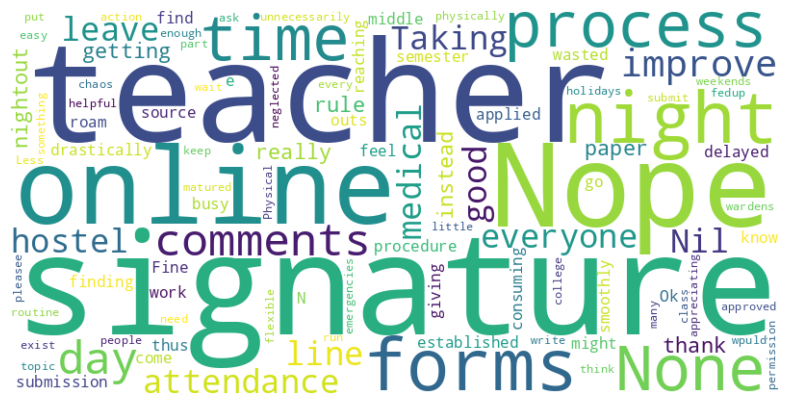

In [210]:
# creating wordcloud for most repeating words
comments = df["AddComs"]
combined_comments = comments.str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(combined_comments)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: >

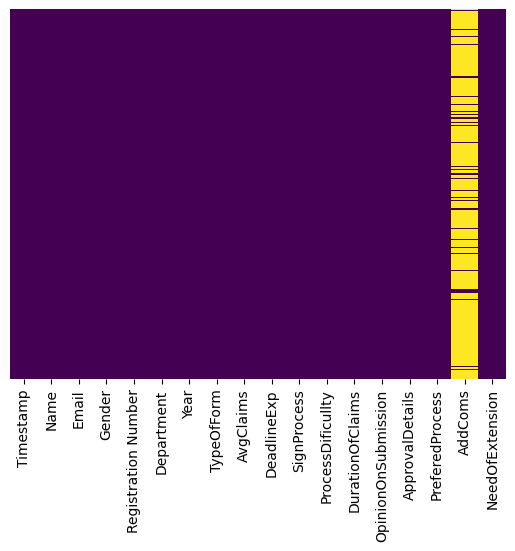

In [211]:
# creating heat map for showing missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') # cheking there are any missing values or not

In [212]:
# drop unwanted features
df.drop(["Timestamp","Name","Email","Registration Number","AddComs"],axis=1,inplace=True)

In [213]:
df

,Gender,Department,Year,TypeOfForm,AvgClaims,DeadlineExp,SignProcess,ProcessDificullty,DurationOfClaims,OpinionOnSubmission,ApprovalDetails,PreferedProcess,NeedOfExtension
0,Female,MSC DS,1st Year,Medical form,0 - 25%,Bad,Bad,Hard,A couple of days,Bad,At all times,Online submission process,Yes
1,Male,MSC DS,1st Year,Co-curricular form,0 - 25%,Bad,Need Improvement,Medium,A couple of days,Bad,Mostly approved,Online submission process,Yes
2,Female,MSC DS,1st Year,None,0 - 25%,Needs Improvement,Average,Medium,More than a week,Average,Mostly approved,Online submission process,Yes
3,Female,MSC EA,1st Year,Night-out form,25 - 50%,Average,Average,Medium,One day,Average,Mostly approved,Online submission process,Yes
4,Female,MSC DS,1st Year,Medical form,0 - 25%,Good,Good,Medium,A couple of days,Needs Improvement,Mostly approved,Online submission process,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Female,MBA,1st Year,Medical form,25 - 50%,Bad,Bad,Hard,More than a week,Bad,Mostly approved,Online submission process,Yes
379,Male,BBA,1st Year,Medical form,50 - 75%,Average,Need Improvement,Medium,A couple of days,Average,Mostly approved,Online submission process,Maybe
380,Male,MBA,1st Year,Night-out form,50 - 75%,Average,Average,Hard,A couple of days,Average,Mostly approved,Offline submission process,No
381,Female,MBA,1st Year,Night-out form,0 - 25%,Bad,Bad,Hard,A few hours,Bad,At all times,Online submission process,Yes


In [214]:
# export the clened csv file
df.to_csv('cleaned_df.csv', index=False)

In [215]:
data=pd.read_csv("cleaned_df.csv")

In [216]:
data

,Gender,Department,Year,TypeOfForm,AvgClaims,DeadlineExp,SignProcess,ProcessDificullty,DurationOfClaims,OpinionOnSubmission,ApprovalDetails,PreferedProcess,NeedOfExtension
0,Female,MSC DS,1st Year,Medical form,0 - 25%,Bad,Bad,Hard,A couple of days,Bad,At all times,Online submission process,Yes
1,Male,MSC DS,1st Year,Co-curricular form,0 - 25%,Bad,Need Improvement,Medium,A couple of days,Bad,Mostly approved,Online submission process,Yes
2,Female,MSC DS,1st Year,None,0 - 25%,Needs Improvement,Average,Medium,More than a week,Average,Mostly approved,Online submission process,Yes
3,Female,MSC EA,1st Year,Night-out form,25 - 50%,Average,Average,Medium,One day,Average,Mostly approved,Online submission process,Yes
4,Female,MSC DS,1st Year,Medical form,0 - 25%,Good,Good,Medium,A couple of days,Needs Improvement,Mostly approved,Online submission process,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Female,MBA,1st Year,Medical form,25 - 50%,Bad,Bad,Hard,More than a week,Bad,Mostly approved,Online submission process,Yes
379,Male,BBA,1st Year,Medical form,50 - 75%,Average,Need Improvement,Medium,A couple of days,Average,Mostly approved,Online submission process,Maybe
380,Male,MBA,1st Year,Night-out form,50 - 75%,Average,Average,Hard,A couple of days,Average,Mostly approved,Offline submission process,No
381,Female,MBA,1st Year,Night-out form,0 - 25%,Bad,Bad,Hard,A few hours,Bad,At all times,Online submission process,Yes


In [217]:
# extracting how many data we have and how many features we have
data.shape

(383, 13)

<Axes: ylabel='Department'>

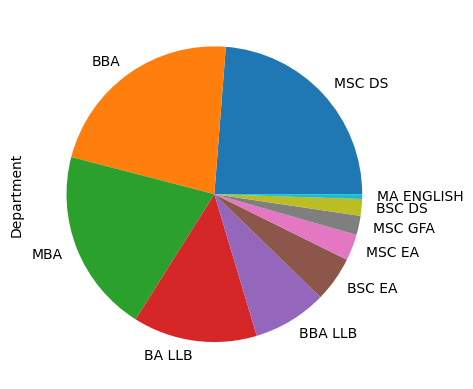

In [218]:
# ploting a pie chart for dept
data["Department"].value_counts().plot(kind="pie")

<Axes: ylabel='AvgClaims'>

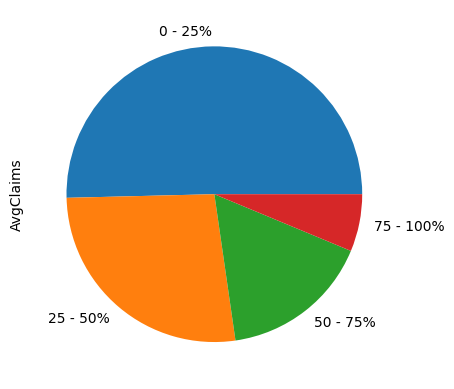

In [219]:
# plot a pie chart on avg claims
data["AvgClaims"].value_counts().plot(kind="pie")

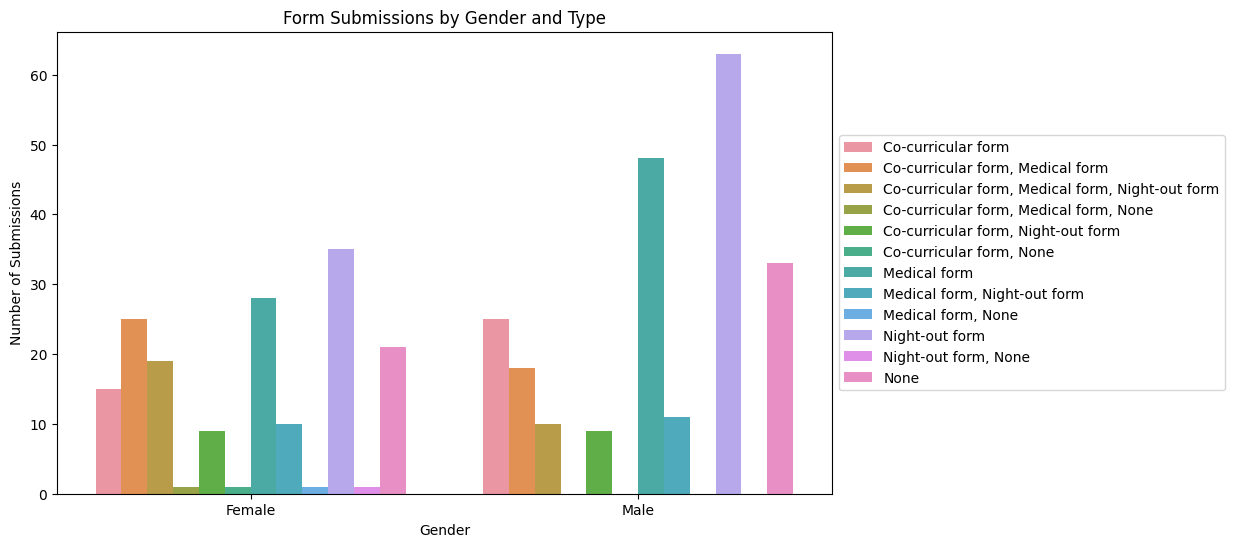

In [220]:
gender_form_counts = data.groupby(['Gender', 'TypeOfForm'])['ApprovalDetails'].count().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='ApprovalDetails', hue='TypeOfForm', data=gender_form_counts)
plt.title('Form Submissions by Gender and Type')
plt.ylabel('Number of Submissions')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

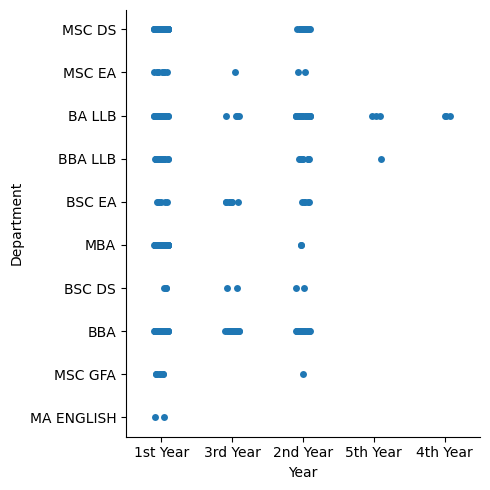

In [221]:
sns.catplot(data=data, x="Year", y="Department")

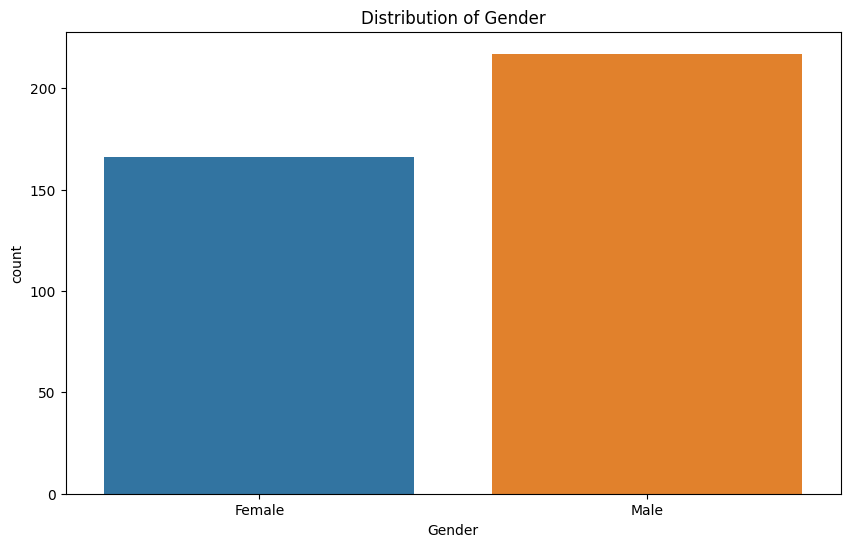

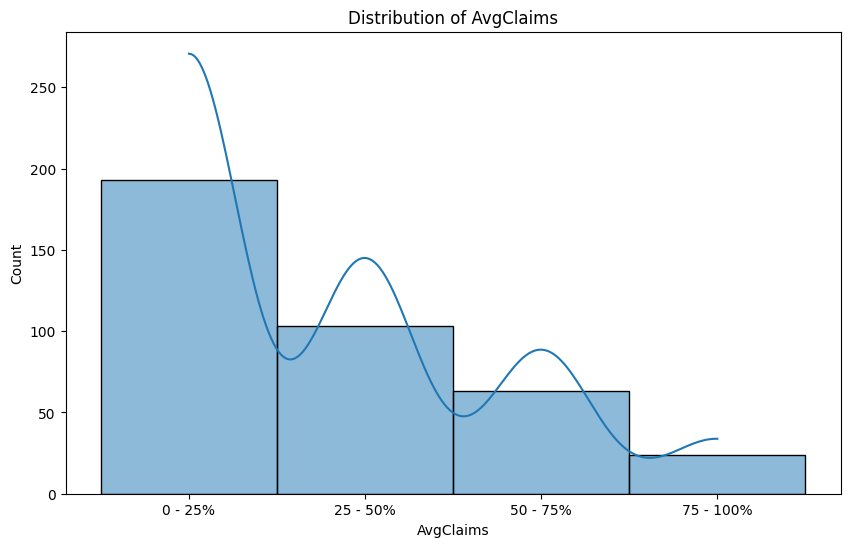

In [222]:
# Example of a bar plot for a categorical variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=data)
plt.title('Distribution of Gender')
plt.show()

# Example of a histogram for a numerical variable
plt.figure(figsize=(10, 6))
sns.histplot(data['AvgClaims'], bins=20,kde=True)
plt.title('Distribution of AvgClaims')
plt.show()

In [223]:
contingency_table = pd.crosstab(data['Gender'], data['Year'])
contingency_table

Year,1st Year,2nd Year,3rd Year,4th Year,5th Year
Gender,,,,,
Female,100,50,11,2,3
Male,167,27,21,1,1


In [224]:
contingency_table = pd.crosstab(data['TypeOfForm'], data['Department'])
contingency_table

Department,BA LLB,BBA,BBA LLB,BSC DS,BSC EA,MA ENGLISH,MBA,MSC DS,MSC EA,MSC GFA
TypeOfForm,,,,,,,,,,
Co-curricular form,6,9,4,0,3,0,13,4,1,0
"Co-curricular form, Medical form",7,16,9,1,2,0,1,6,0,1
"Co-curricular form, Medical form, Night-out form",9,9,2,1,4,0,0,3,1,0
"Co-curricular form, Medical form, None",0,1,0,0,0,0,0,0,0,0
"Co-curricular form, Night-out form",2,6,4,0,1,0,3,1,0,1
"Co-curricular form, None",0,0,0,0,0,0,0,1,0,0
Medical form,8,11,1,4,2,0,26,20,2,2
"Medical form, Night-out form",3,5,3,0,2,0,2,4,1,1
"Medical form, None",0,0,1,0,0,0,0,0,0,0


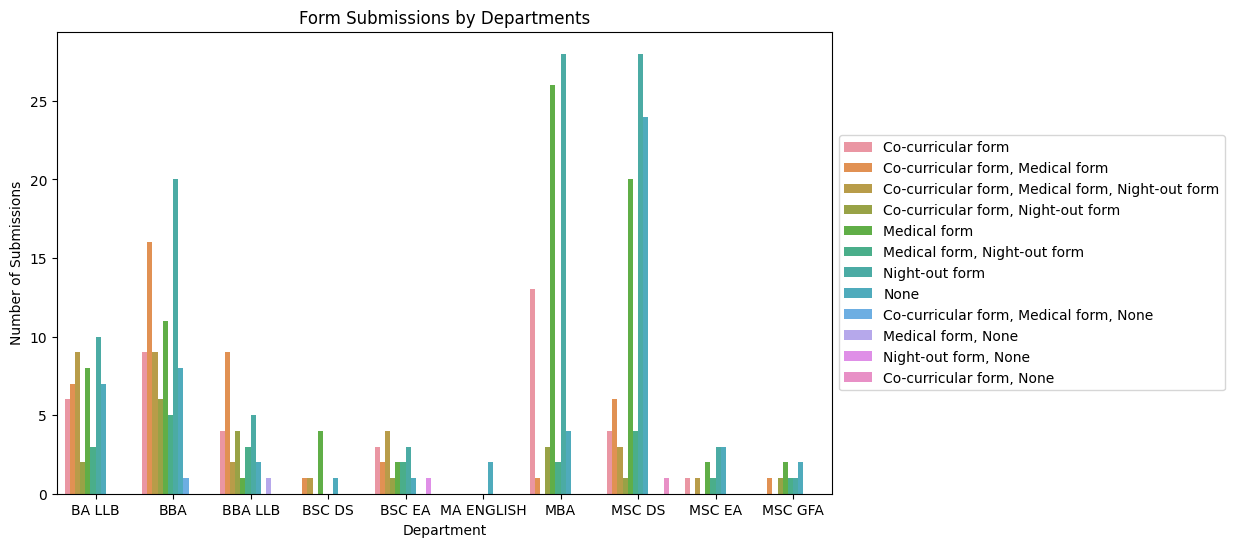

In [225]:
gender_form_counts = data.groupby(['Department', 'TypeOfForm'])['ApprovalDetails'].count().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='ApprovalDetails', hue='TypeOfForm', data=gender_form_counts)
plt.title('Form Submissions by Departments')
plt.ylabel('Number of Submissions')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               383 non-null    object
 1   Department           383 non-null    object
 2   Year                 383 non-null    object
 3   TypeOfForm           383 non-null    object
 4   AvgClaims            383 non-null    object
 5   DeadlineExp          383 non-null    object
 6   SignProcess          383 non-null    object
 7   ProcessDificullty    383 non-null    object
 8   DurationOfClaims     383 non-null    object
 9   OpinionOnSubmission  383 non-null    object
 10  ApprovalDetails      383 non-null    object
 11  PreferedProcess      383 non-null    object
 12  NeedOfExtension      383 non-null    object
dtypes: object(13)
memory usage: 39.0+ KB


<Axes: >

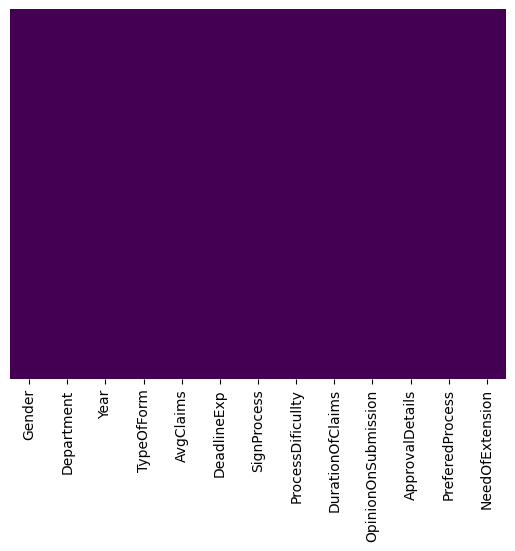

In [227]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis') # cheking there are any missing values or not

<Axes: xlabel='PreferedProcess', ylabel='count'>

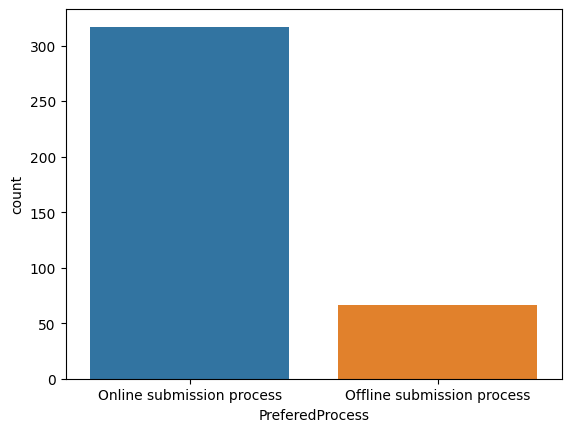

In [228]:
sns.countplot(x='PreferedProcess',data=data)

<Axes: xlabel='Department', ylabel='count'>

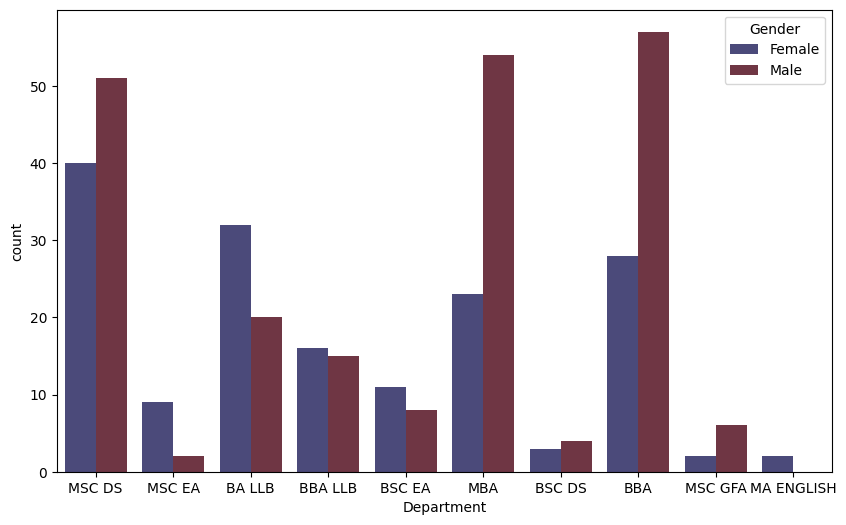

In [229]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Department',hue='Gender',data=data, palette='icefire')

# Compare how often the form you avail with the form people has most used.


In [230]:
most_used_form = data['TypeOfForm'].mode()[0]
most_used_form_count = data[data['TypeOfForm'] == most_used_form]['TypeOfForm'].count()
print(f"People most often use '{most_used_form}' form {most_used_form_count} times.")

People most often use 'Night-out form' form 98 times.


#How often form is used with year vs difficulty level

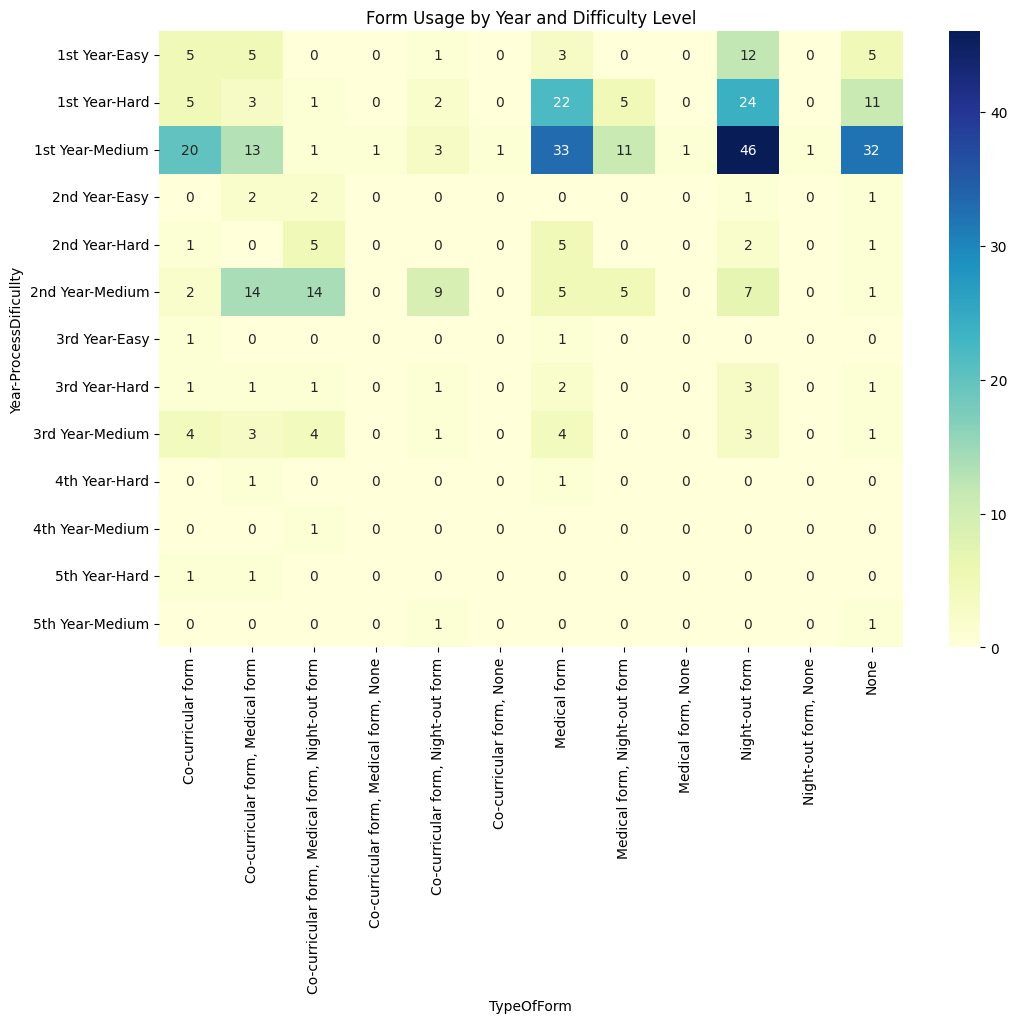

In [231]:
grouped = data.groupby(['Year', 'ProcessDificullty', 'TypeOfForm']).size().unstack(fill_value=0)
# grouped
plt.figure(figsize=(12, 8))
sns.heatmap(grouped, annot=True, cmap='YlGnBu')
plt.title('Form Usage by Year and Difficulty Level')
plt.show()

#Difficulty level vs experience with paper based form

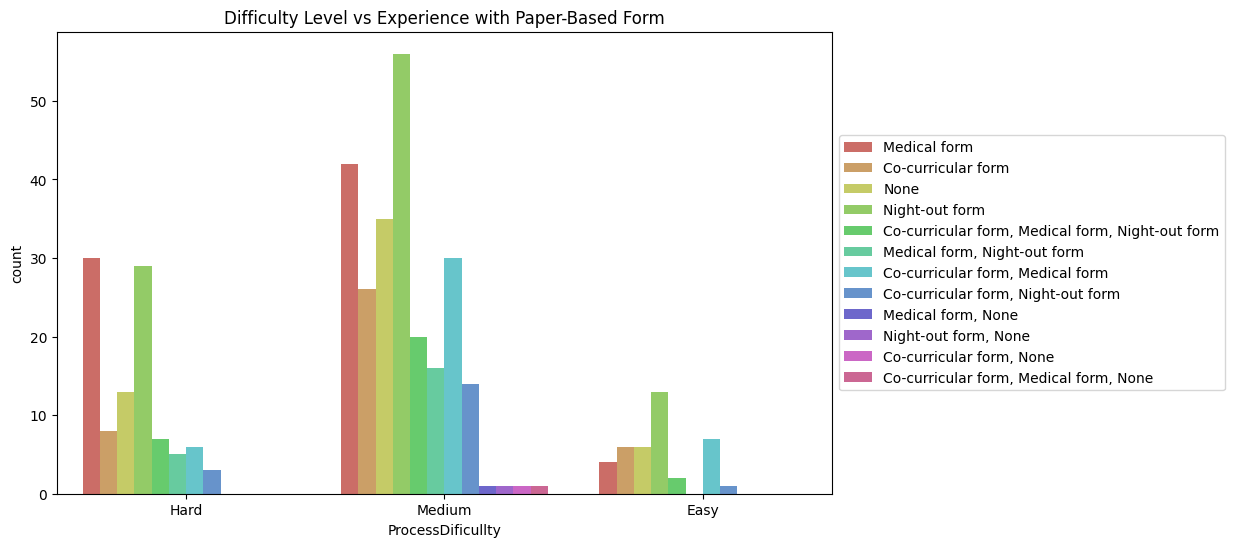

In [232]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ProcessDificullty', hue='TypeOfForm', data=data, palette='hls')
plt.title('Difficulty Level vs Experience with Paper-Based Form')
plt.xticks(rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#Deadline vs process of securing signatures

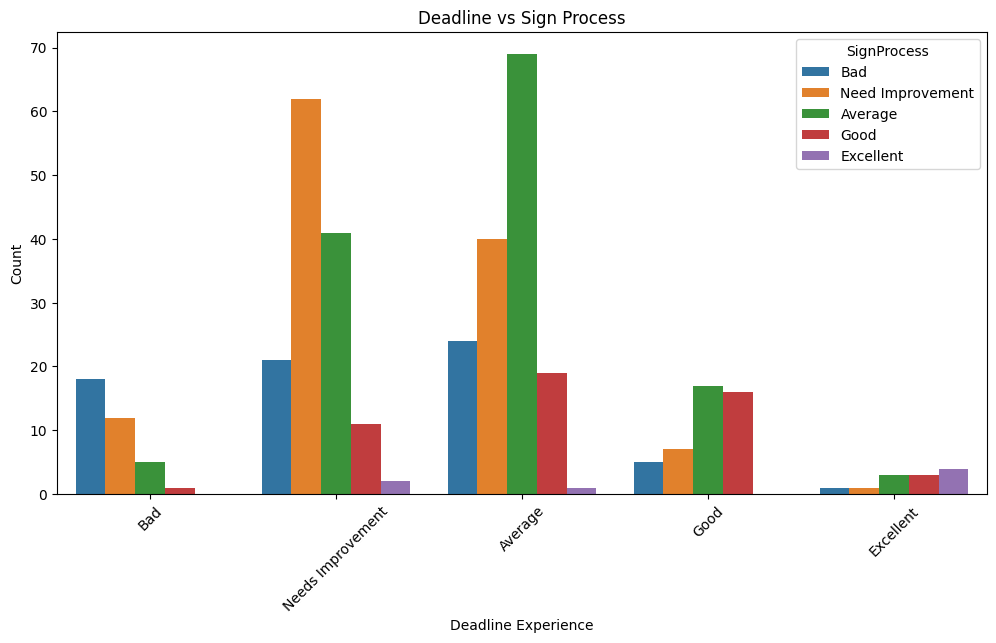

In [233]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='DeadlineExp', hue='SignProcess')

# Customize the plot
plt.title('Deadline vs Sign Process')
plt.xlabel('Deadline Experience')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

#Time taken vs no of times form is approved

Text(0, 0.5, 'Number of Times Form is Approved')

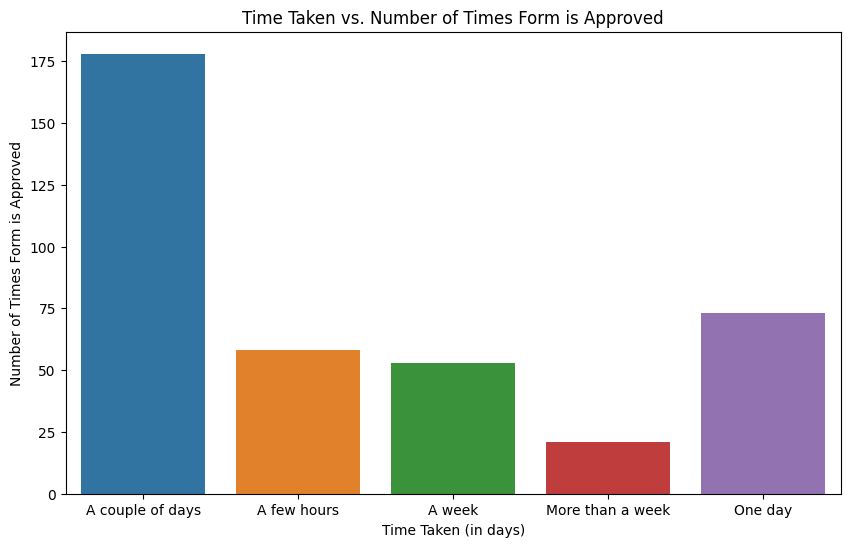

In [234]:
approval_counts = data.groupby('DurationOfClaims')['ApprovalDetails'].count().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='DurationOfClaims', y='ApprovalDetails', data=approval_counts)

plt.title('Time Taken vs. Number of Times Form is Approved')
plt.xlabel('Time Taken (in days)')
plt.ylabel('Number of Times Form is Approved')


#Time taken vs opinion on whether deadline must be increased

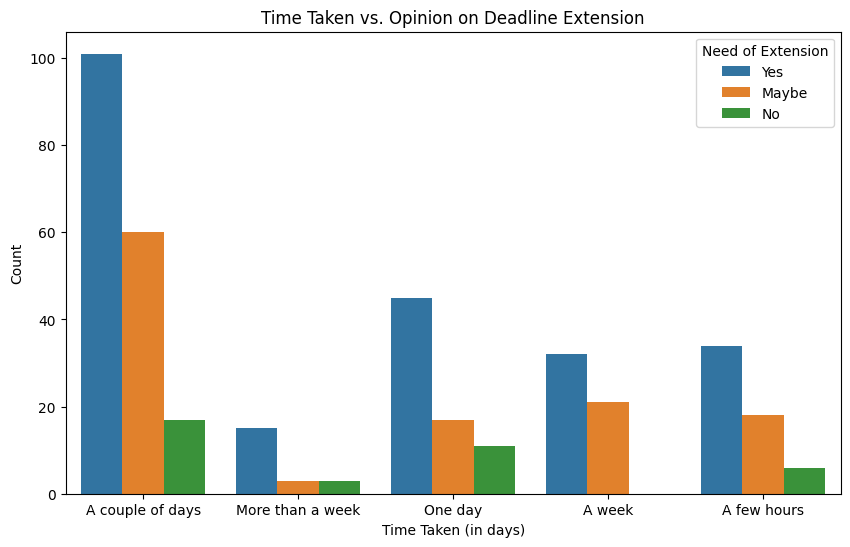

In [235]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DurationOfClaims', hue='NeedOfExtension', data=data)

plt.title('Time Taken vs. Opinion on Deadline Extension')
plt.xlabel('Time Taken (in days)')
plt.ylabel('Count')
plt.legend(title='Need of Extension', loc='upper right')

plt.show()

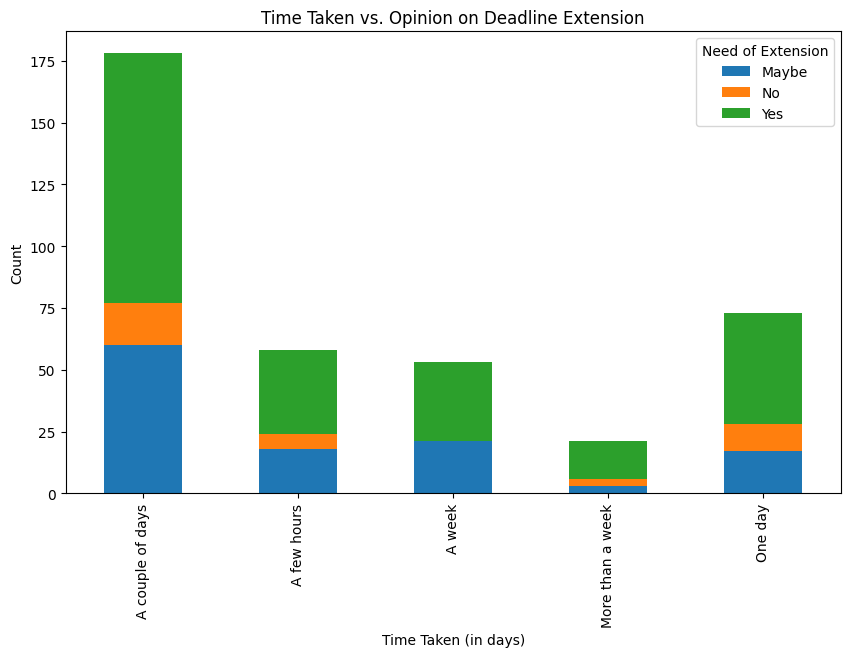

In [236]:
ct = pd.crosstab(data['DurationOfClaims'], data['NeedOfExtension'])
ct.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Time Taken vs. Opinion on Deadline Extension')
plt.xlabel('Time Taken (in days)')
plt.ylabel('Count')
plt.legend(title='Need of Extension', loc='upper right')


plt.show()

#Experience vs Online or offline OR difficulty level vs online/offline

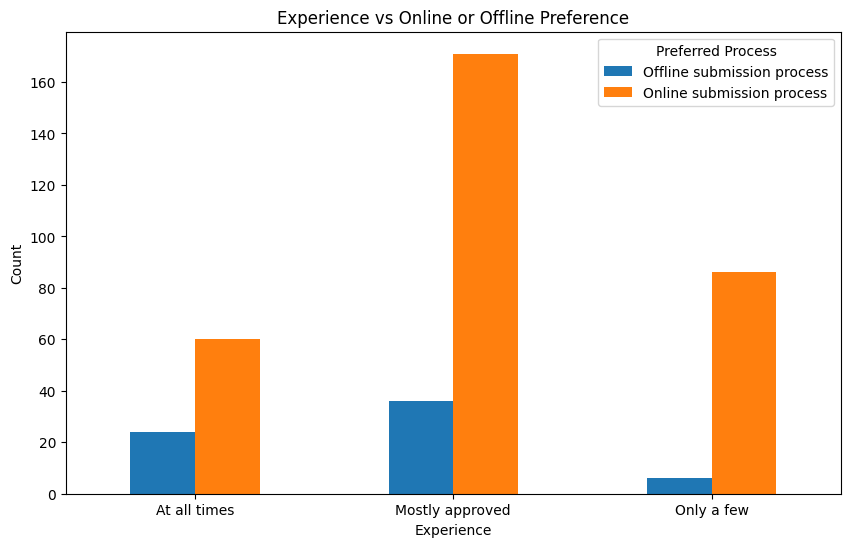

In [237]:
ct = pd.crosstab(data['ApprovalDetails'], data['PreferedProcess'])

ct.plot(kind='bar', figsize=(10, 6))

plt.title('Experience vs Online or Offline Preference')
plt.xlabel('Experience')
plt.ylabel('Count')
plt.legend(title='Preferred Process')

plt.xticks(rotation=0)
plt.show()

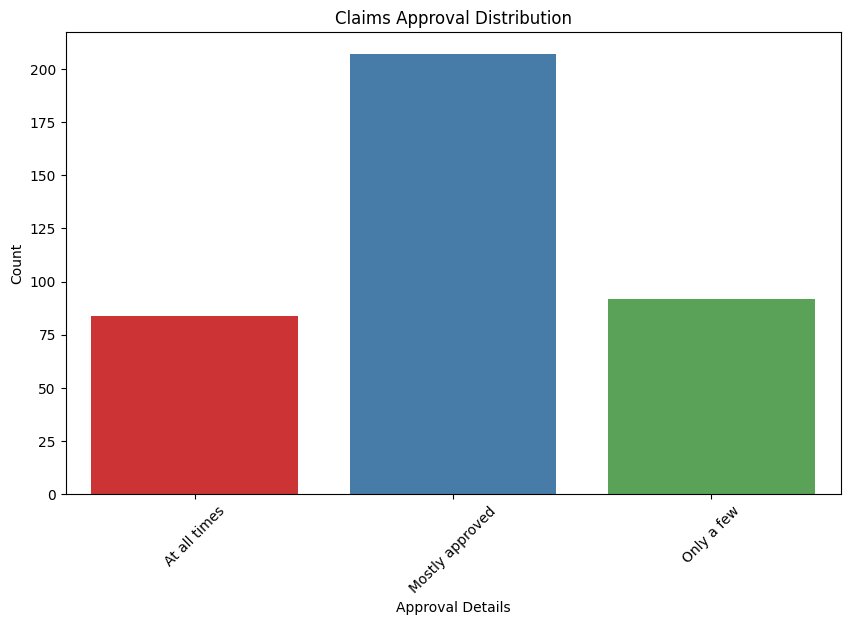

In [238]:
# Create a bar plot for claims approval distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='ApprovalDetails', data=df, palette='Set1')
plt.title('Claims Approval Distribution')
plt.xlabel('Approval Details')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()

#time taken to get the sign vs approval

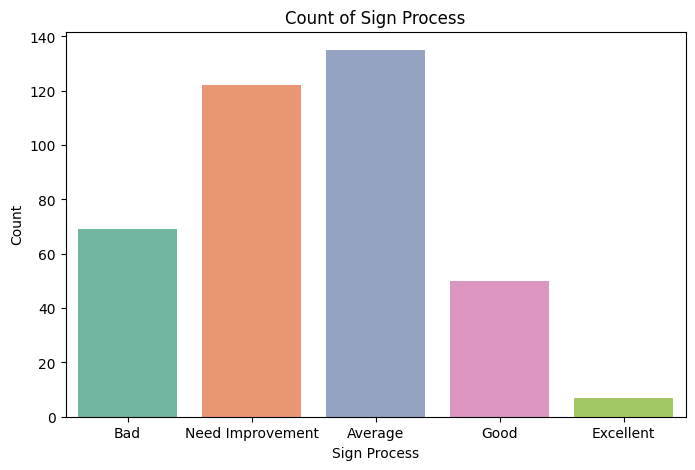

In [239]:
# Plot the count of SignProcess
plt.figure(figsize=(8, 5))
sns.countplot(x='SignProcess', data=df, palette='Set2')

plt.title('Count of Sign Process')
plt.xlabel('Sign Process')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

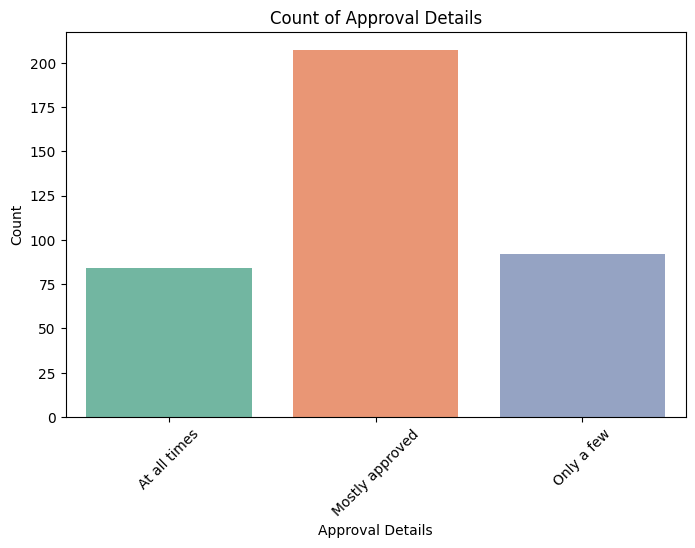

In [240]:
# Plot the count of ApprovalDetails
plt.figure(figsize=(8, 5))
sns.countplot(x='ApprovalDetails', data=df, palette='Set2')

plt.title('Count of Approval Details')
plt.xlabel('Approval Details')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

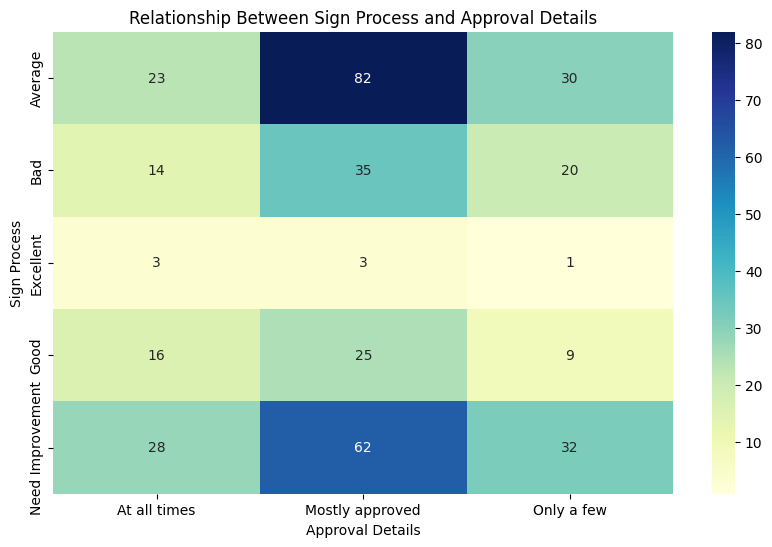

In [241]:
cross_table = pd.crosstab(df['SignProcess'], df['ApprovalDetails'])

# Create a heatmap to visualize the relationship
plt.figure(figsize=(10, 6))
sns.heatmap(cross_table, annot=True, cmap='YlGnBu', fmt='d')

plt.title('Relationship Between Sign Process and Approval Details')
plt.xlabel('Approval Details')
plt.ylabel('Sign Process')

plt.show()

#Difficulty level vs what is time taken to submit a paper based form.

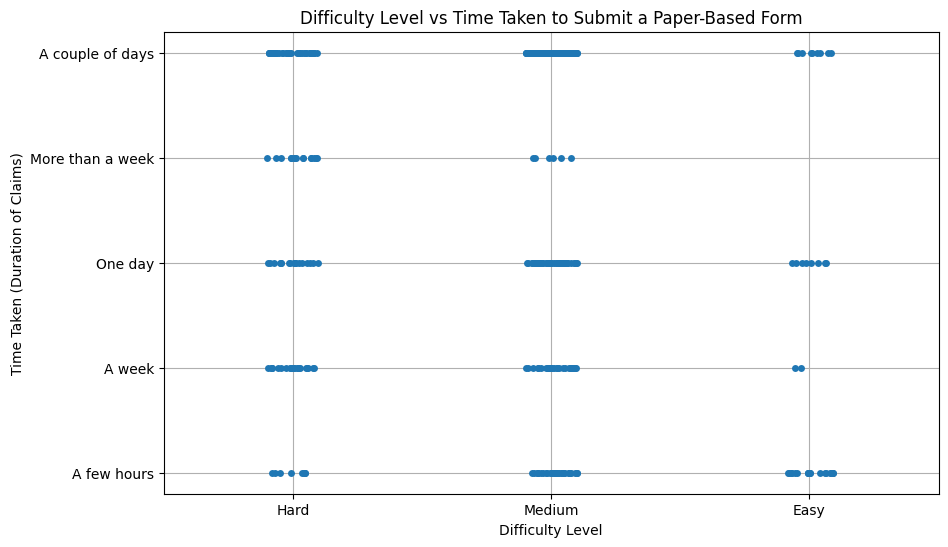

In [242]:
# Create a categorical scatter plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='ProcessDificullty', y='DurationOfClaims', data=df, jitter=True)

plt.title('Difficulty Level vs Time Taken to Submit a Paper-Based Form')
plt.xlabel('Difficulty Level')
plt.ylabel('Time Taken (Duration of Claims)')

plt.grid(True)
plt.show()

In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               383 non-null    object
 1   Department           383 non-null    object
 2   Year                 383 non-null    object
 3   TypeOfForm           383 non-null    object
 4   AvgClaims            383 non-null    object
 5   DeadlineExp          383 non-null    object
 6   SignProcess          383 non-null    object
 7   ProcessDificullty    383 non-null    object
 8   DurationOfClaims     383 non-null    object
 9   OpinionOnSubmission  383 non-null    object
 10  ApprovalDetails      383 non-null    object
 11  PreferedProcess      383 non-null    object
 12  NeedOfExtension      383 non-null    object
dtypes: object(13)
memory usage: 39.0+ KB


# Time taken vs online or offline form submission.
(not needed)

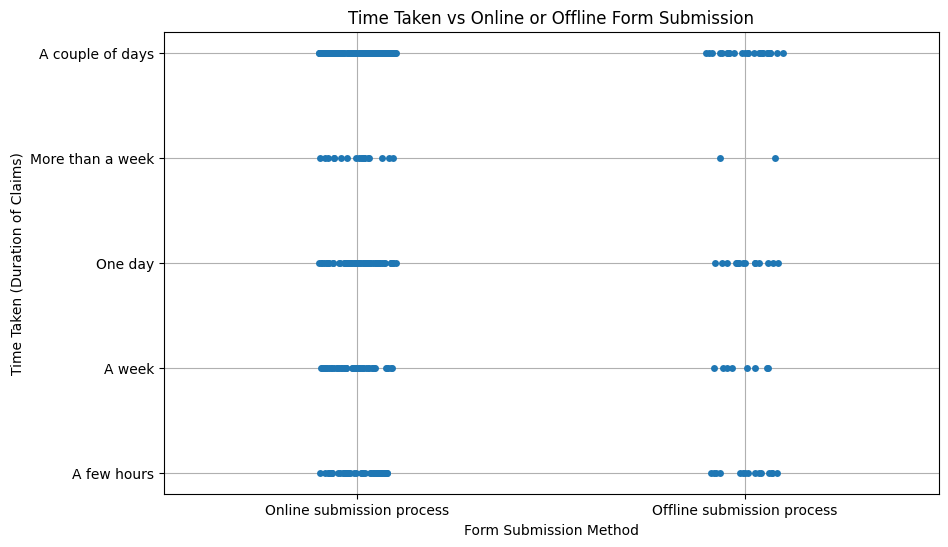

In [244]:
# Create a categorical scatter plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='PreferedProcess', y='DurationOfClaims', data=df, jitter=True)

plt.title('Time Taken vs Online or Offline Form Submission')
plt.xlabel('Form Submission Method')
plt.ylabel('Time Taken (Duration of Claims)')

plt.grid(True)
plt.show()

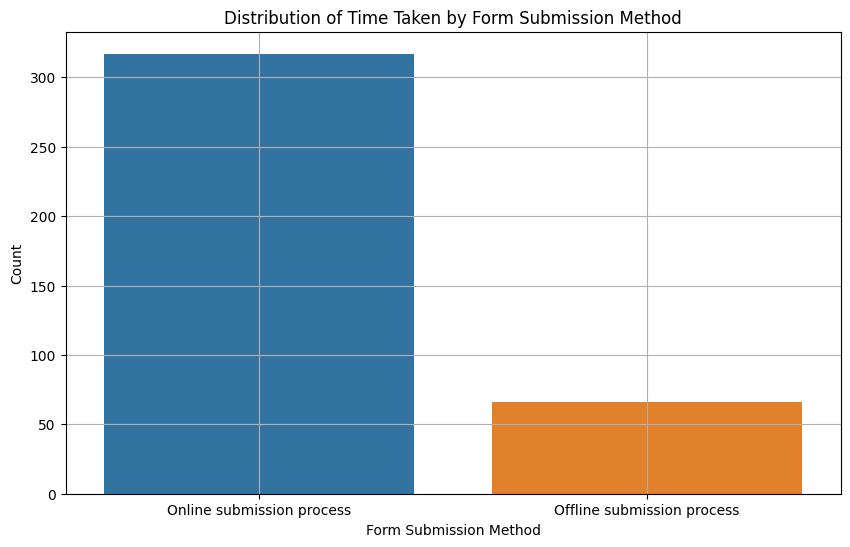

In [245]:
# Create a count plot to show the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PreferedProcess')#, hue='DurationOfClaims')

plt.title('Distribution of Time Taken by Form Submission Method')
plt.xlabel('Form Submission Method')
plt.ylabel('Count')

plt.grid(True)
plt.show()

#conclusion

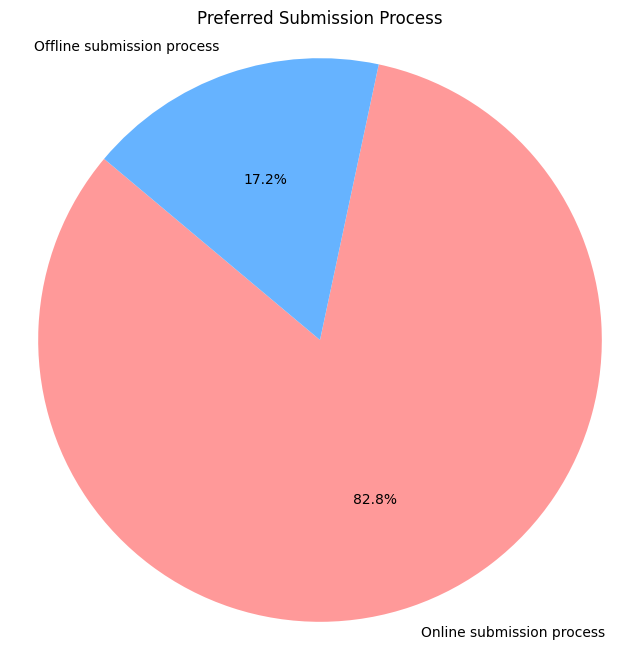

In [246]:
preferred_process_counts = df['PreferedProcess'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2']
plt.pie(preferred_process_counts, labels=preferred_process_counts.index, autopct='%1.1f%%', startangle=140,colors=colors)
plt.title('Preferred Submission Process')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


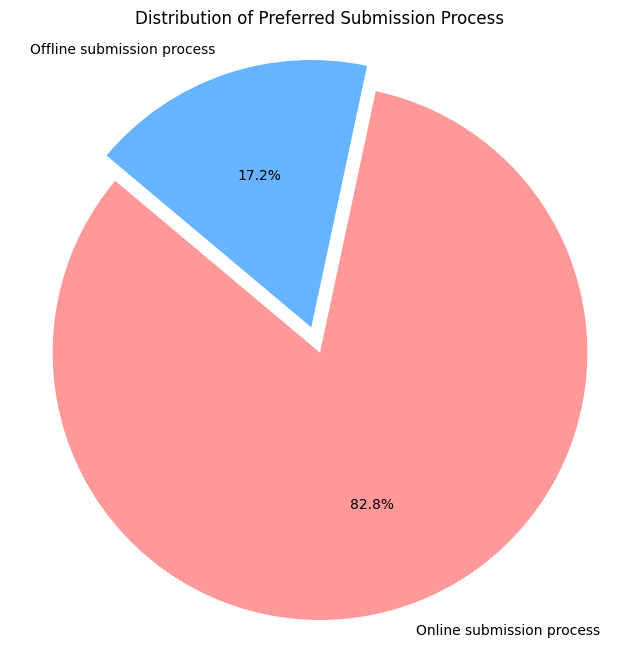

In [247]:
preferred_process_counts = df['PreferedProcess'].value_counts()

labels = preferred_process_counts.index
colors = ['#ff9999', '#66b3ff']

explode = (0,0.1)

plt.figure(figsize=(8, 8))
plt.pie(preferred_process_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Distribution of Preferred Submission Process')
plt.axis('equal')
plt.show()